# Analyse des données du cancer de sein (Wisconsin Cancer)

## Partie III - Modeling

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler

### Récupération des données

In [3]:
cancer = pd.read_csv('data/data.csv',sep=",")

In [4]:
# On a pas besoin des colonnes 'id' et 'unamed' donc on les enlève 

cancer = cancer.drop(columns=['id','Unnamed: 32'])

cancer = cancer.rename(columns={'concave points_worst':'concave_points_worst', 
                                'concave points_mean':'concave_points_mean', 
                                'concave points_se':'concave_points_se'}) # remplacer ' ' par '_' 

In [30]:
from sklearn.preprocessing import StandardScaler

x = cancer.drop(columns='diagnosis')

y = cancer['diagnosis']

#Il faut absolument scale ici, sinon on a une erreur

standardized = StandardScaler()
standardized.fit(x)
x = standardized.transform(x)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)



## Regression Logisitique

In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score


model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print("Précision des training : ", model.score(x_train, y_train))
print("Précision des tests : ", model.score(x_test, y_test))

# Rapport de classification
cr = classification_report(y_test, y_pred)
print(cr)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

Précision des training :  0.989010989010989
Précision des tests :  0.9736842105263158
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[71  1]
 [ 2 40]]


## PCA (Analyse en composantes principales)

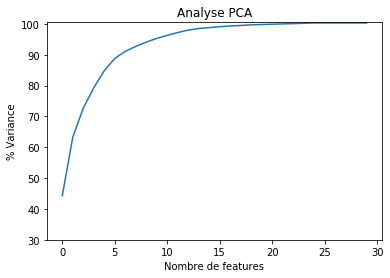

In [37]:
from sklearn.decomposition import PCA


pca = PCA(30,random_state =0)
pca.fit(x)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance')
plt.xlabel('Nombre de features')
plt.title('Analyse PCA')
plt.ylim(30,100.5)

plt.plot(var)

plt.show()
